## March Madness Analysis

In [130]:
## Import Statement
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from kenpompy.utils import login
import kenpompy.summary as kp
import kenpompy.misc as km
import os
import matplotlib.pyplot as plt

In [133]:
# Returns an authenticated browser that can then be used to scrape pages that require authorization.
browser = login("<KENPOM ACCOUNT EMAIL>", "<KENPOM ACCOUNT PASSWORD")

In [135]:
## Loading in season and getting the top 20 KenPom rated teams
table = km.get_pomeroy_ratings(browser, season=None)
new_table = table.head(20)

In [154]:
## Loading in the school logos for the top 20 teams

logos = os.listdir(os.getcwd() + '/team_logos')

logo_paths = []

for i in logos:
    logo_paths.append(os.getcwd() + '/team_logos/' + str(i))
    
def getImage(path): 
    return OffsetImage(plt.imread(path), zoom=.5)

In [156]:
# sorting the top 20 teams by team name
new_table = new_table.sort_values(by = 'Team')

# converting AdjO and AdjD columns to float columns
new_table["new_adj_O"] = new_table.iloc[:,5].astype(float)
new_table["new_adj_D"] = new_table.iloc[:,7].astype(float)

# adding a column for the school logos
new_table["logos"] = logo_paths

### NCAA Basketball Team Tiers

Text(0.15, 0.07, 'Data: kenpom.com')

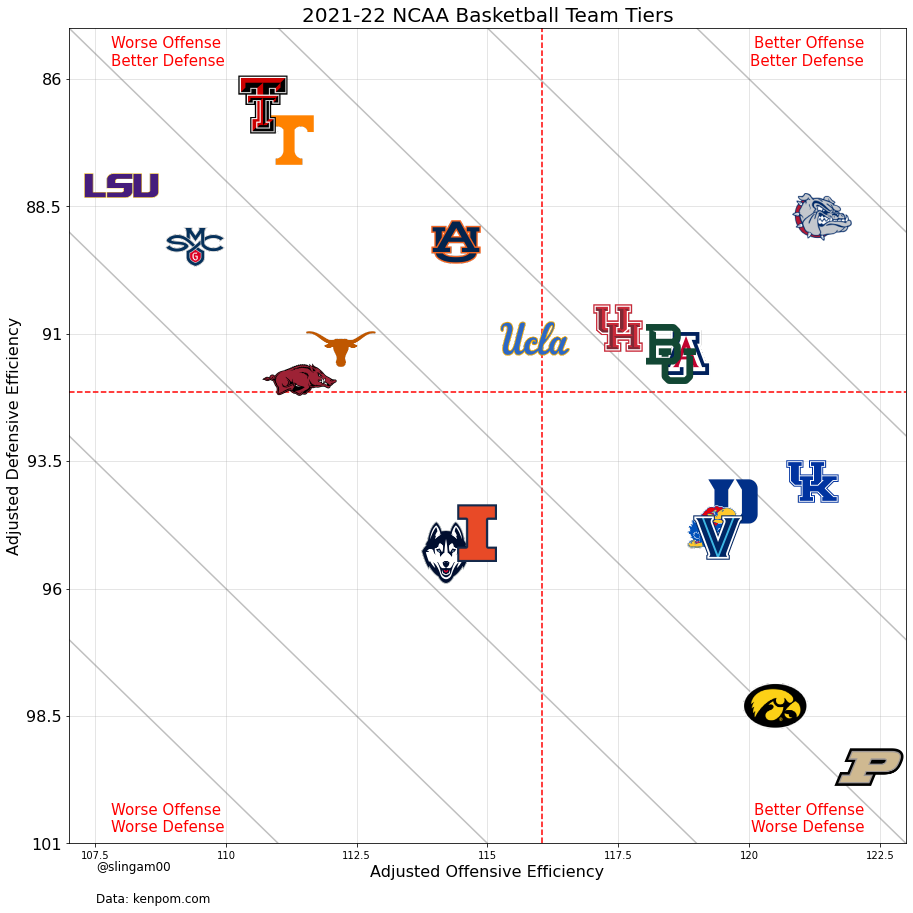

In [161]:
#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(15,15))

x = new_table.new_adj_O
y = new_table.new_adj_D

ax.axvline(x=x.mean(), linestyle='--', color='red')
ax.axhline(y=y.mean(), linestyle='--', color='red')

#Adding logos to the chart
for x0, y0, path in zip(x, y, logo_paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False, fontsize=4)
    ax.add_artist(ab)
    
#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)
    
#Adding labels and text
ax.set_xlabel('Adjusted Offensive Efficiency', fontsize=16)
ax.set_ylabel('Adjusted Defensive Efficiency', fontsize=16)

ax.set_xlim(107, 123)
ax.set_xticks([107.5, 110, 112.5, 115, 117.5, 120, 122.5])
ax.set_xticklabels([107.5, 110, 112.5, 115, 117.5, 120, 122.5])

#Start y-axis at .3 (30%) to eliminate wasted space
ax.set_ylim(101,85)
ax.set_yticks([101, 98.5, 96, 93.5, 91, 88.5, 86])
ax.set_yticklabels([101, 98.5, 96, 93.5, 91, 88.5, 86],fontsize=16)

ax.text(0.95, 0.01, 'Better Offense\nWorse Defense',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='red', fontsize=15)

ax.text(0.95, 0.99, 'Better Offense\nBetter Defense',
        verticalalignment='top', horizontalalignment='right',
        transform=ax.transAxes,
        color='red', fontsize=15)

ax.text(0.05, 0.99, 'Worse Offense\nBetter Defense',
        verticalalignment='top', horizontalalignment='left',
        transform=ax.transAxes,
        color='red', fontsize=15)

ax.text(0.05, 0.05, 'Worse Offense\nWorse Defense',
        verticalalignment='top', horizontalalignment='left',
        transform=ax.transAxes,
        color='red', fontsize=15)

ax.axline((119, 85), slope=1, color='grey', label='by slope', alpha = 0.5)

ax.axline((115, 85), slope=1, color='grey', label='by slope', alpha = 0.5)

ax.axline((111, 85), slope=1, color='grey', label='by slope', alpha = 0.5)

ax.axline((107, 85), slope=1, color='grey', label='by slope', alpha = 0.5)

ax.axline((103, 85), slope=1, color='grey', label='by slope', alpha = 0.5)

ax.axline((99, 85), slope=1, color='grey', label='by slope', alpha = 0.5)

ax.axline((95, 85), slope=1, color='grey', label='by slope', alpha = 0.5)


ax.set_title('2021-22 NCAA Basketball Team Tiers', fontsize=20)
plt.figtext(.15, .1, '@slingam00', fontsize=12)
plt.figtext(.15, .07, 'Data: kenpom.com', fontsize=12)
